In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("/Users/oeendrila/Documents/GitHub/lab-eda-univariate/amz_uk_processed_data.csv")  
   
pd.set_option('display.max_columns', None)

In [211]:
df.head(2)

,asin,title,img_url,product_url,stars,reviews,price,is_best_seller,bought_last_month,category_name
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers


In [5]:
df.dtypes                            #asin = product id 

asin                  object
title                 object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
categoryName          object
dtype: object

In [6]:
df.columns

Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'isBestSeller', 'boughtInLastMonth', 'categoryName'],
      dtype='object')

# Data Cleaning
 checked for duplicates, missing values, space - none found

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['asin', 'title', 'imgurl', 'producturl', 'stars', 'reviews', 'price',
       'isbestseller', 'boughtinlastmonth', 'categoryname'],
      dtype='object')

In [9]:
df = df.rename(columns={
    'imgurl': 'img_url',
    'producturl': 'product_url',
    'isbestseller': 'is_best_seller',
    'boughtinlastmonth': 'bought_last_month',
    'categoryname': 'category_name'
})

# QUestion 1 

Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [12]:

frequency_table = df['category_name'].value_counts().head(5)

In [13]:
frequency_table.reset_index().head(5)
print("Top 5 most frequent categories:\n", frequency_table)

Top 5 most frequent categories:
 category_name
Sports & Outdoors               826076
Skin Care                        18755
Fragrances                       18563
Make-up                          18453
Manicure & Pedicure Products     17212
Name: count, dtype: int64


In [14]:
df2 = frequency_table.reset_index().head(5)
df2

,category_name,count
0,Sports & Outdoors,826076
1,Skin Care,18755
2,Fragrances,18563
3,Make-up,18453
4,Manicure & Pedicure Products,17212


In [15]:
#understanding product categories
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
%matplotlib inline


/var/folders/35/95bptg013g75yzs_np0t8xw00000gn/T/ipykernel_58380/1532629427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x = 'category_name',y = 'count', data=df2, palette ="Set2")


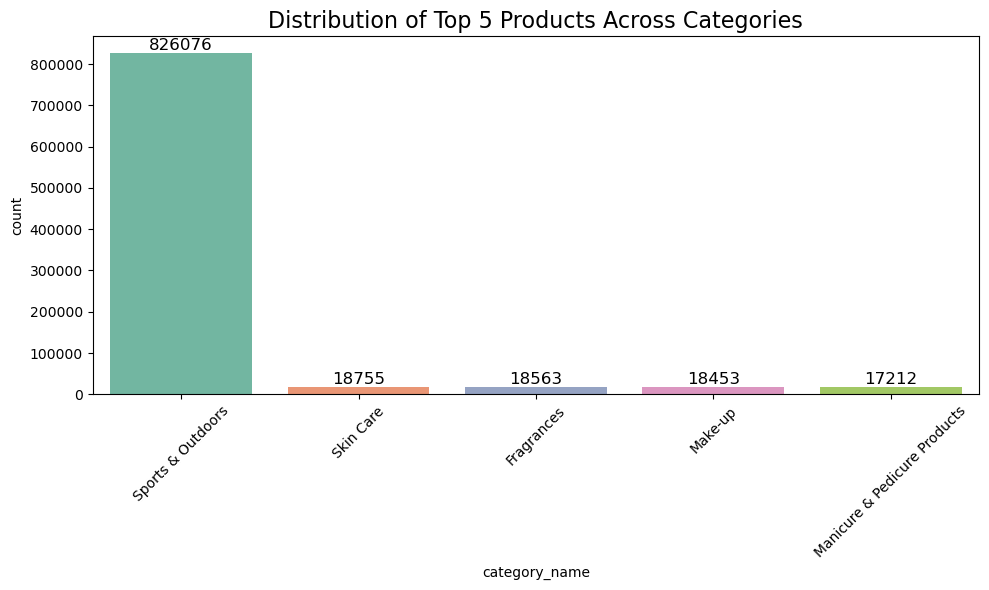

In [17]:
#visualising distribution of products across categories
plt.figure(figsize=(10, 6))

plt.title('Distribution of Top 5 Products Across Categories', fontsize=16)                   #select plot title 
plot = sns.barplot(x = 'category_name',y = 'count', data=df2, palette ="Set2")
plt.xticks(rotation=45)



for p in plot.patches:  # Iterate over bars (called patches) p refers to a single bar in the bar plot 
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 

#get height is the method by which you draw the bar acc to the value
                #integer function to turn a float into an integer and then ultimately to a string
                  # (p.get_x() + p.get_width() / 2., p.get_height()) = is the formula to calculate the size nad positioning of text over
                  #the patches
                
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=12,  # Font size
        color='black')# Text color 
plt.tight_layout()
plt.show()

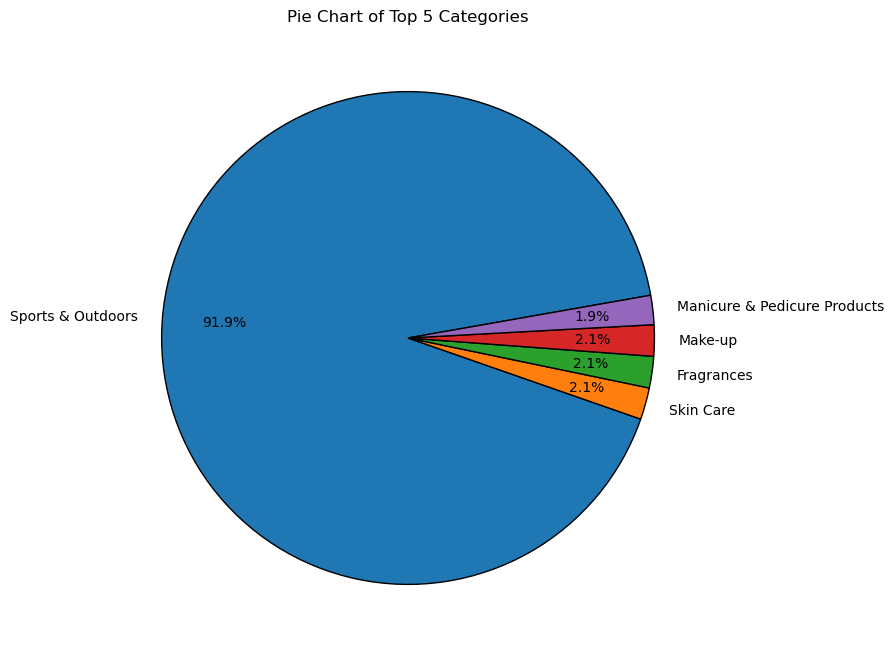

In [18]:

# Data for the pie chart

plt.figure(figsize=(8, 8))
plt.pie(df2['count'], labels=df2['category_name'],autopct='%1.1f%%', startangle=10, wedgeprops={'edgecolor': 'black'},  # Add border between slices
    pctdistance=0.75),  # #fixing the startangle and playing around with the value made it more legible, adding edgecolour also increased 
        #readability  #pctdistance played around with where the percentage figures would


plt.title('Pie Chart of Top 5 Categories')     
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [102]:
mean_price = df.price.mean().round(2)
print (mean_price)

94.26


In [120]:
median_price= df.price.median()
median_price

19.9

In [126]:
import statistics

In [132]:
from statistics import multimode

In [138]:
price = df["price"]
modes = multimode(price)
modes

[9.99]

In [140]:
print (f"Average price point of products listed: {mean_price}")
print (f"Median point of products: {median}")
print (f"Mode point of products: {modes}")

Average price point of products listed: 94.26
Median point of products: 70.9836872902928
Mode point of products: [9.99]


The mean of 94.26 dollars indicates that some products are very expensive raising the average because the most 
frequently listed product is only 9.99 dollars 

   

In [164]:
# estimating measures of dispersion -Determine the variance, standard deviation, range, and interquartile range for product price.
#How varied are the product prices? Are there any indicators of a significant spread in prices?
df.price.describe().T.round(2)

count    2222742.00
mean          94.26
std          360.62
min            0.00
25%           10.00
50%           19.90
75%           47.71
max       100000.00
Name: price, dtype: float64

In [191]:
variance = statistics.variance(price)# ALTERNATIVELY IT IS STD**2
print (f'the standard deviation of the price is {variance}')

the standard deviation of the price is 130048.56935147636


In [176]:
print (f'the standard deviation of the price is $360.62')

the standard deviation of the price is $360.62


In [179]:
price_range = max(price) - min(price)  
print (f'the range of prices is {price_range}')#max-min

the range of prices is 100000.0


In [189]:
print (f"the interquartile range is $37.71") 
#there is significant range and variance for product price 

the interquartile range is $37.71


**Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

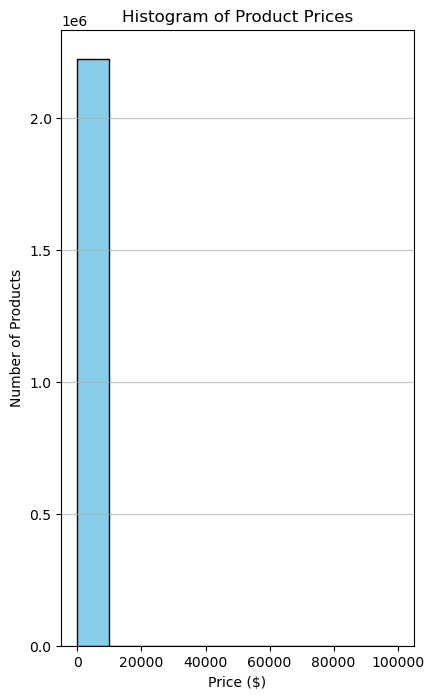

In [225]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(df['price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.75)

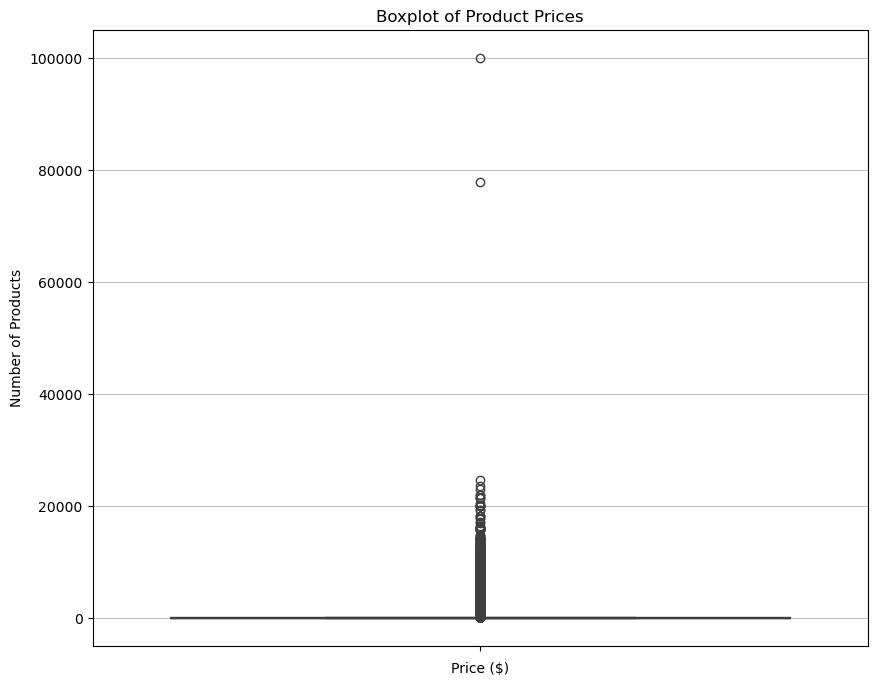

In [233]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = df['price'])
plt.title('Boxplot of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.75)